## Sprint 論文読解入門

### 2.論文読解


以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。

[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99

https://arxiv.org/pdf/1506.01497.pdf

#### 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。

#### (1) 物体検出の分野にはどういった手法が存在したか。


・SPPnet (K. He, X. Zhang, S. Ren, and J. Sun, “Spatial pyramid poolingin  deep  convolutional  networks  for  visual  recognition,”  inEuropean Conference on Computer Vision (ECCV), 2014)  

・Fast R-CNN (R. Girshick, “Fast R-CNN,” inIEEE International Conference onComputer Vision (ICCV), 2015)

-要約から

#### (2) Fasterとあるが、どういった仕組みで高速化したのか。

・今までの手法だと領域提案の計算がボトルネックとなっていた。
・FasterR-CNNでは完全な画像畳み込み特徴を検出ネットワークと共有することで、コストをかけずに領域提案ができるRPN（領域提案ネットワーク）を導入した。

・Faster-RCNNは二つのモジュールで構成されていて、一つは領域を提案する深層畳み込みネットワーク    
もう一つはattentionメカニズムを備えたネットワークで　RPNモジュール 

・attentionを用いたことにより高速化を行なった。  
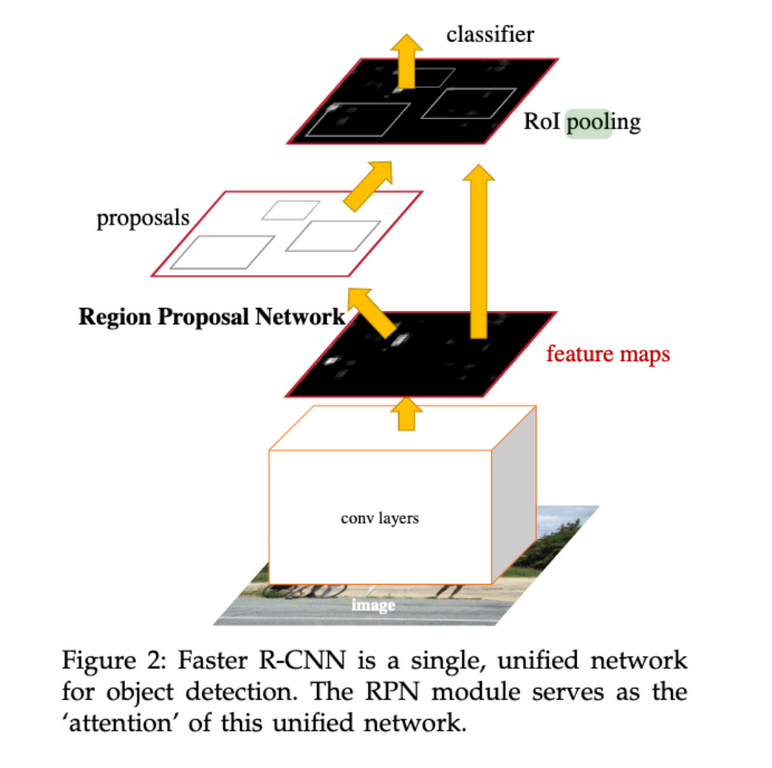

-要約から

#### (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

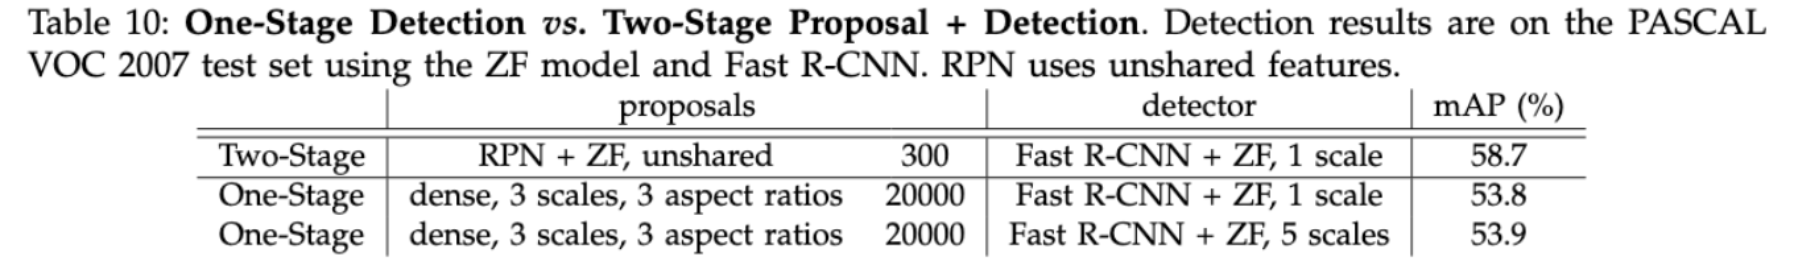

・One-StageはOverFeatisのクラス別検出パイプライン
→  OverFeatでは、地域ごとの特徴は、スケールピラミッド上の1つのアスペクト比のスライディングウィンドウから得られます。この特徴量を用いて、物体の位置とカテゴリーを同時に決定します

・Two-StageはFaster R-CNNのクラス別検出パイプライン
→  RPNでは、正方形（3×3）のスライディングウィンドウから得られる特徴を用いて、異なるスケールとアスペクト比を持つアンカーに対するプロポーザルを予測する。


-3ページ目と10ページ目

#### (4) RPNとは何か。

・RPNは、各位置におけるオブジェクトの境界とオブジェクトネス・スコアを同時に予測する完全畳み込みネットワークである。  
・RPNはエンド・ツー・エンドで学習され、高品質なリージョン提案を生成し、Fast R-CNNで検出に使用されます。さらに、RPNとFast R-CNNの畳み込み機能を共有することで、RPNとFast R-CNNを1つのネットワークに統合します。
・attentionを使用すると、RPNコンポーネントは統合されたネットワークにどこを見るべきかを教えます  

-要約と3ページ目

#### (5) RoIプーリングとは何か。

Fast R-CNNのRoIプーリング層は、畳み込み特徴量と予測されたバウンディングボックスを入力として受け取るので、理論的に有効なバックプロパゲーションソルバーは、ボックス座標に対する勾配も含む。
非近似ジョイントトレーニングソリューションでは、ボックス座標に対して微分可能なRoIプーリング層が必要となる。  

-3ページ目

#### [Fast R-CNN](https://arxiv.org/abs/1504.08083)  

バックプロパゲーションは、RoIプーリング層を介して誘導体をルーティングする。
RoIプーリング層のbackwards関数は、argmaxスイッチに従って、各入力変数xibに関する損失関数の部分的な導関数を計算する。

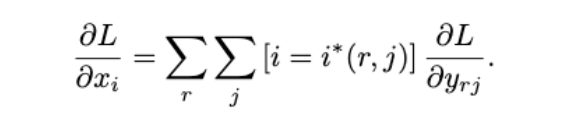

-Fast R-CNNの4ページ目

#### (6) Anchorのサイズはどうするのが適切か。

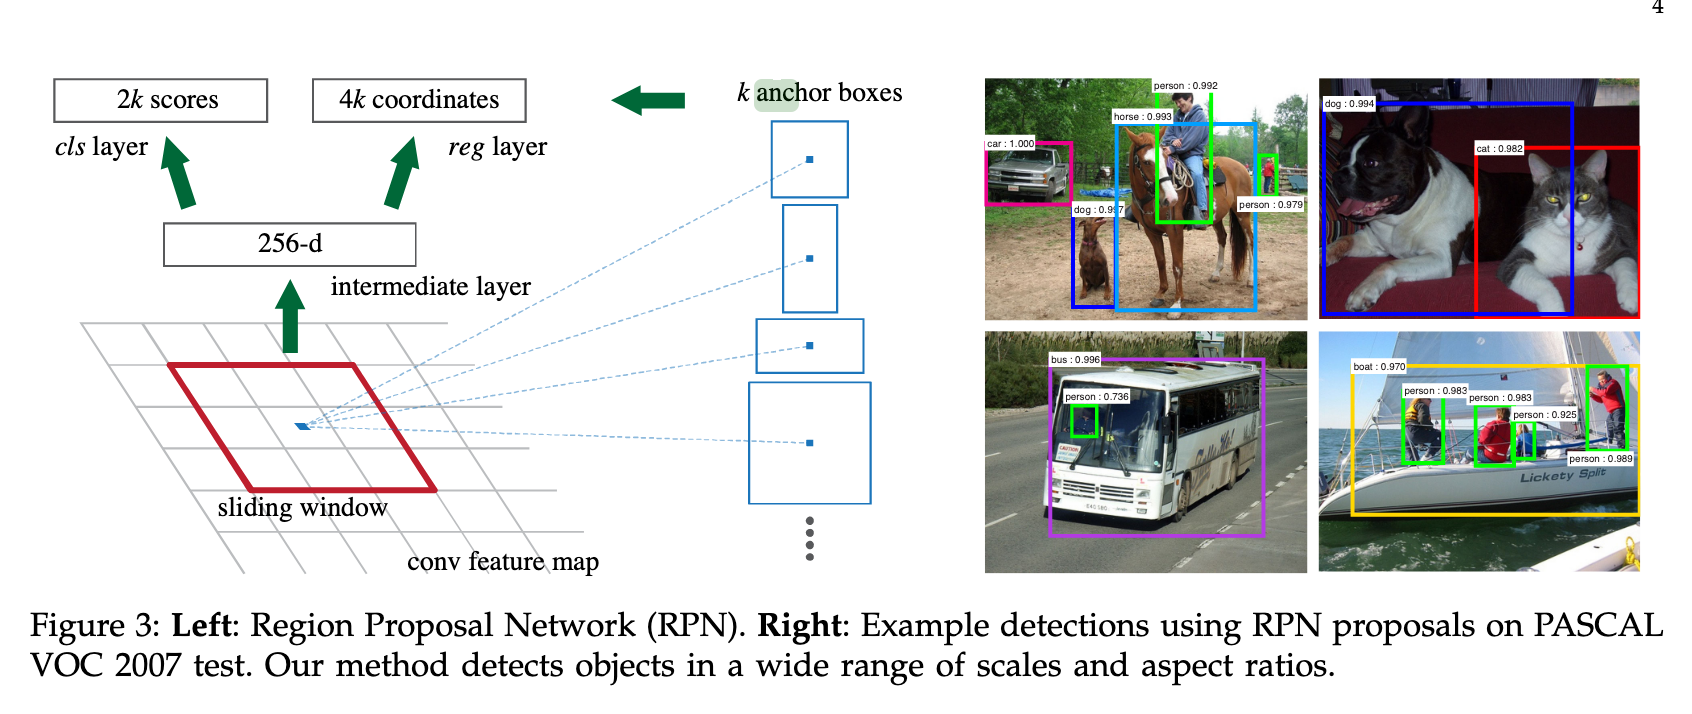


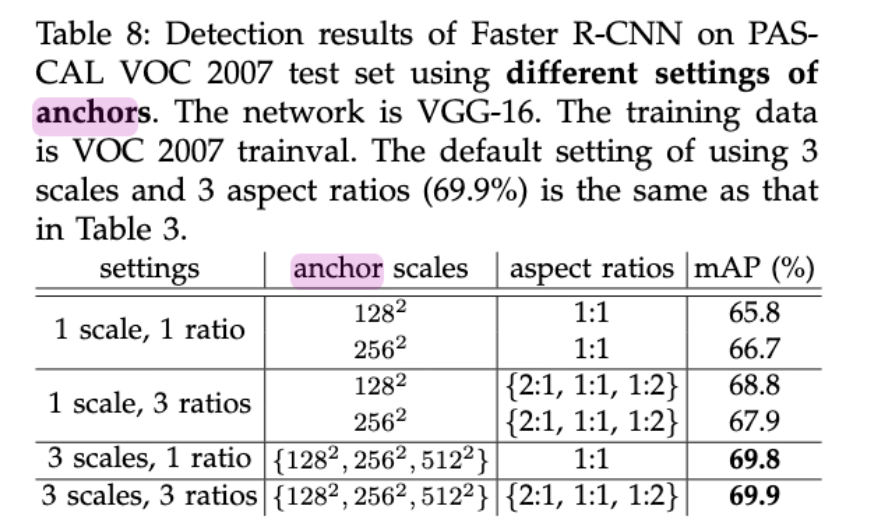

・複数のサイズのアンカーを回帰基準として使用することが効果的なソリューションである。
ということなので、128*128 , 256*256 , 512*512  
などだろう  


-9ページ目

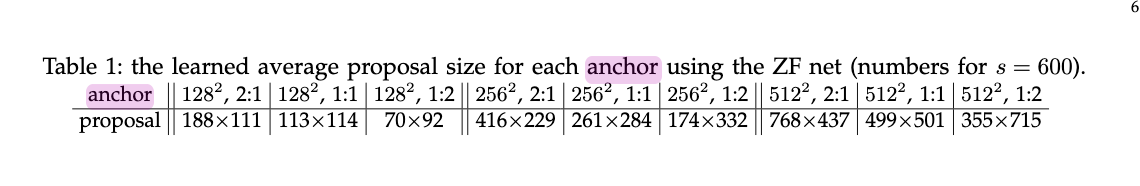  

・一般的な1000×600の画像の場合、合計で約20000個（≒60×40×9）のアンカーが存在する。  
境界を越えたアンカーを無視した場合、学習用のアンカーは1画像あたり約6000個となる。  


実験では3つのアスペクト比と4つのスケール（64*64)を使用している
−10ページ目


#### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか

・MS COCOdataset を使用

・実験方法
8万枚の画像をトレーニングセットに、4万枚の画像を検証セットに、2万枚の画像をテストセットに入れて実験した

・評価
- IoU∈[0.5 : 0.05 : 0.95]で平均化したAP
- mAP@0.5（PASCAL VOCの評価指標）

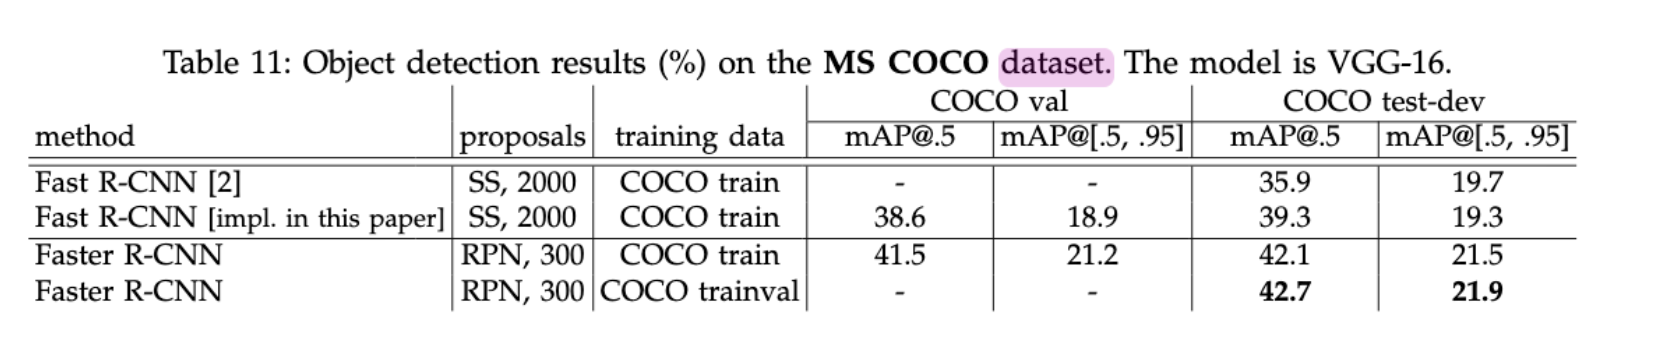

Fast R-CNNベースラインは、test-devセットmAP@0.5の39.3% で、報告された値よりも高い値を示しました。  mAP@[.5, 0.95]は同程度である。

Faster R-CNNは、COCO test-devセット mAP@0.5の42.1%
mAP@[.5, .95]　は21.5%となりました。

Fast R-CNNは　mAP@0.5が2.2%，mAP@[.5, .95]が2.8%高いことを示しています（表11

このことから，RPNはIoU閾値が高い場合の定位精度の模倣に優れていることがわかります．COCO trainval セットを学習に使用した場合、Faster R-CNN は COCO test-dev セットにおいて、mAP@0.5 が 42.7%、mAP@[.5, .95] が 21.9% でした。

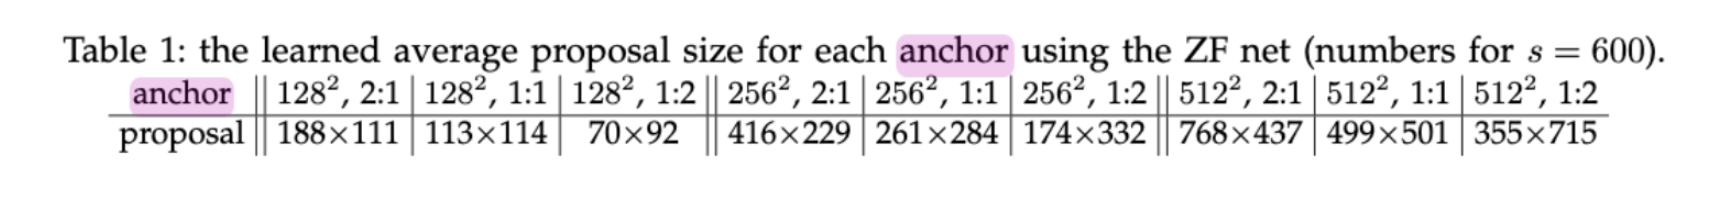

-11ページ参照


・結果
一枚の画像の推論時間
Fast R-CNN:2.3秒
Faster R-CNN:0.2秒

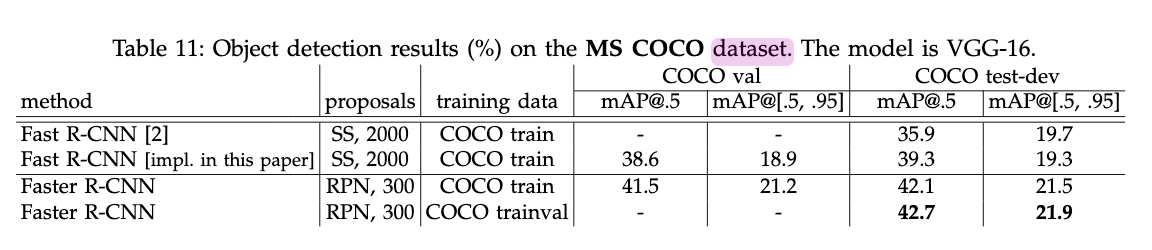

#### (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

[Mask R-CNN](https://arxiv.org/abs/1703.06870)

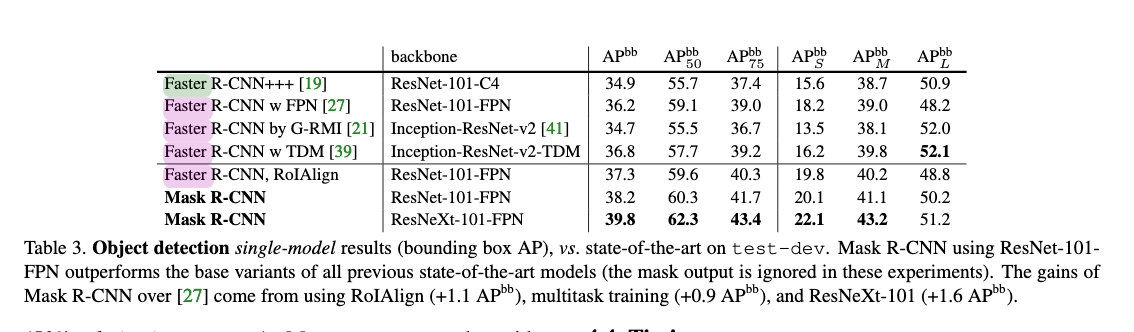

 ベンチマークとして  
 
[End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872)


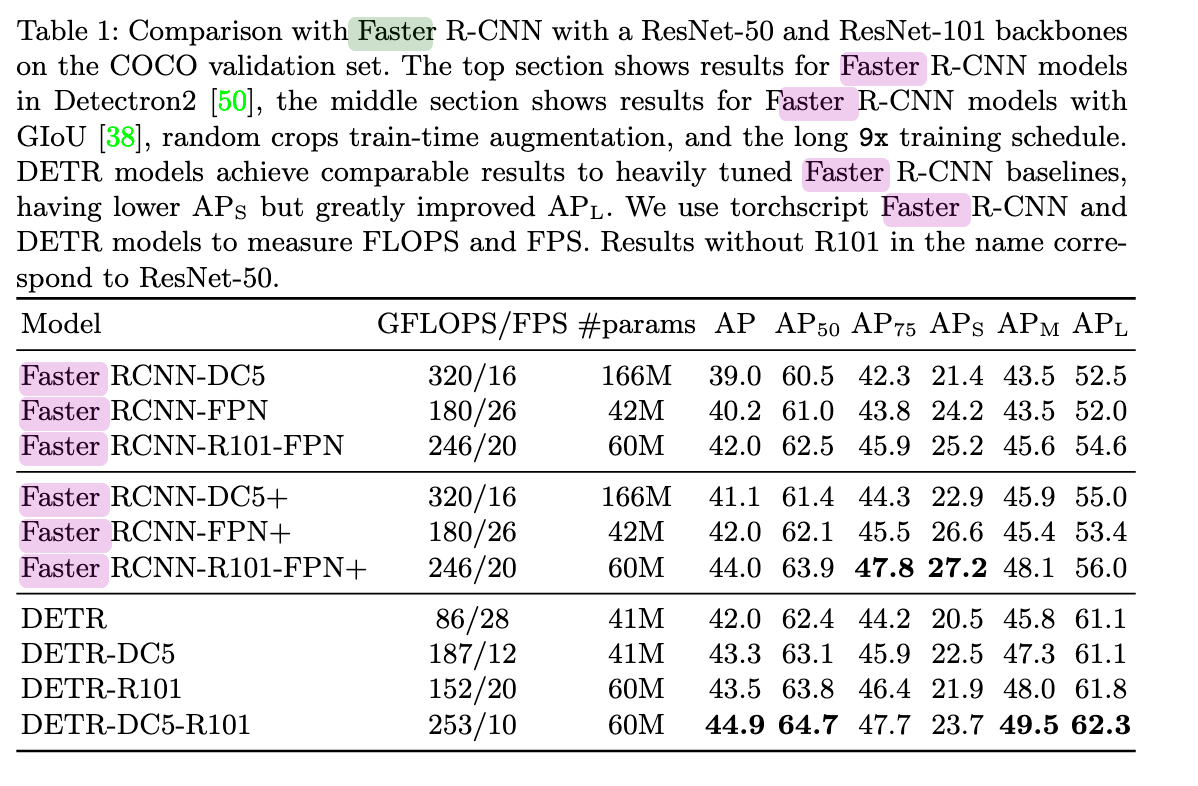

 ベンチマークとして
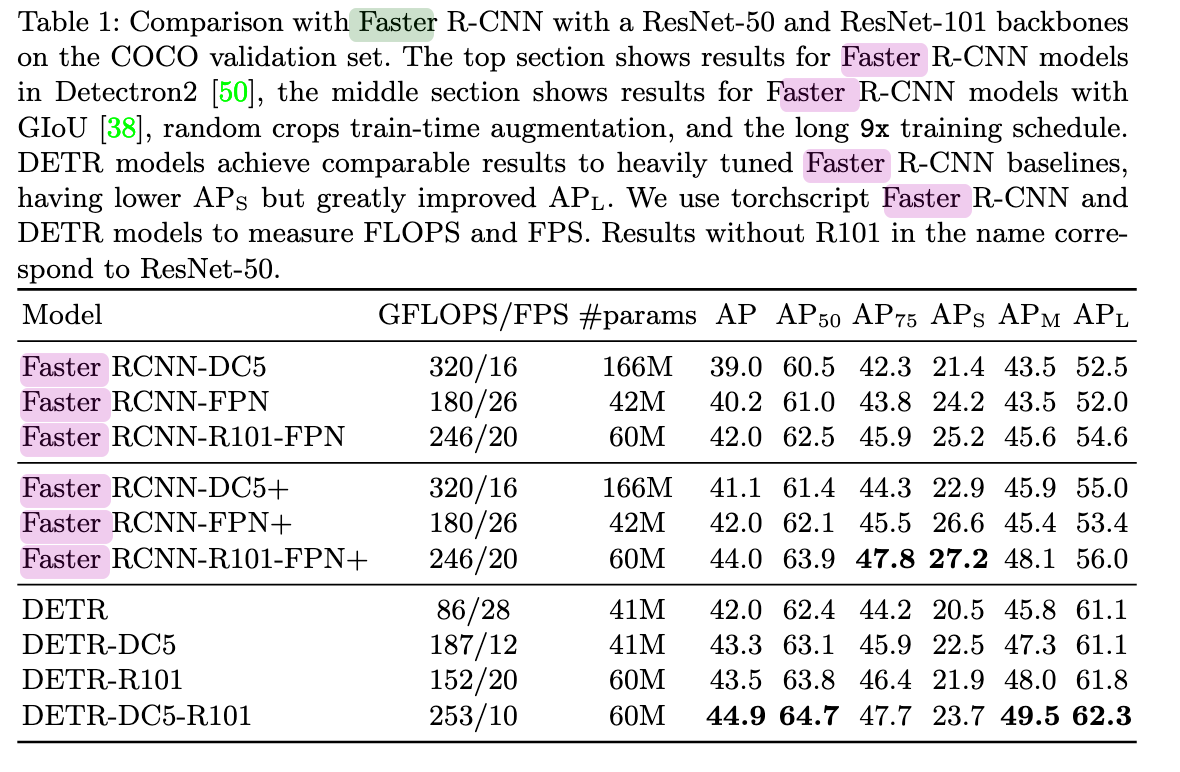

#### 条件
答える際は論文のどの部分からそれが分かるかを書く。  
必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。  
論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。  